<a href="https://colab.research.google.com/github/brunompasini/Digit-Recognizer/blob/master/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Notebook by Bruno Pasini

github.com/brunompasini

In [1]:
from google.colab import files
uploaded = files.upload()

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import pandas as pd
from keras.utils.np_utils import to_categorical
from keras.optimizers import RMSprop

## Reading Data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()
x_train = train.drop(['label'], axis=1)
y_train = train['label']

## Normalizing and Reshaping

In [4]:
x_train = x_train/255.0
test = test/255.0

In [5]:
x_train.shape
# images are 28x28 but are 784 px in line
# and another dimension bc they are in grayscale

x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

x_train.shape

(42000, 28, 28, 1)

## Callbacks class



In [6]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self,epock,logs={}):
    if (logs.get('accuracy')>=0.999):
      print("\nAccuracy is over 99.9%")
      self.model.stop_training = True

callbacks = myCallback()

## CNN Model

In [16]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

## Data Augmentation

In [17]:
from keras.preprocessing.image import ImageDataGenerator

datag = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.3
    )

datag.fit(x_train)

## Training

In [18]:
history = model.fit(x_train, y_train, epochs=32, batch_size = 100, callbacks=[callbacks])

Epoch 1/32
420/420 [==============================] - 2s 4ms/step - loss: 0.2516 - accuracy: 0.9243
Epoch 2/32
420/420 [==============================] - 2s 4ms/step - loss: 0.0650 - accuracy: 0.9793
Epoch 3/32
420/420 [==============================] - 2s 4ms/step - loss: 0.0460 - accuracy: 0.9855
Epoch 4/32
420/420 [==============================] - 2s 4ms/step - loss: 0.0347 - accuracy: 0.9894
Epoch 5/32
420/420 [==============================] - 2s 4ms/step - loss: 0.0297 - accuracy: 0.9906
Epoch 6/32
420/420 [==============================] - 2s 4ms/step - loss: 0.0250 - accuracy: 0.9915
Epoch 7/32
420/420 [==============================] - 2s 4ms/step - loss: 0.0202 - accuracy: 0.9930
Epoch 8/32
420/420 [==============================] - 2s 4ms/step - loss: 0.0193 - accuracy: 0.9936
Epoch 9/32
420/420 [==============================] - 2s 4ms/step - loss: 0.0156 - accuracy: 0.9947
Epoch 10/32
420/420 [==============================] - 2s 4ms/step - loss: 0.0131 - accuracy: 0.9960

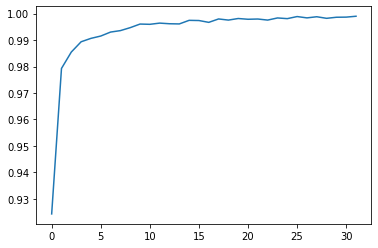

In [19]:
plt.plot(history.history['accuracy'])

In [20]:
history = model.fit(datag.flow(x_train, y_train, batch_size=100), epochs=32, callbacks=[callbacks])

Epoch 1/32
420/420 [==============================] - 11s 25ms/step - loss: 0.1789 - accuracy: 0.9479
Epoch 2/32
420/420 [==============================] - 11s 26ms/step - loss: 0.1009 - accuracy: 0.9682
Epoch 3/32
420/420 [==============================] - 11s 26ms/step - loss: 0.0807 - accuracy: 0.9752
Epoch 4/32
420/420 [==============================] - 11s 26ms/step - loss: 0.0746 - accuracy: 0.9773
Epoch 5/32
420/420 [==============================] - 11s 26ms/step - loss: 0.0685 - accuracy: 0.9785
Epoch 6/32
420/420 [==============================] - 11s 26ms/step - loss: 0.0627 - accuracy: 0.9805
Epoch 7/32
420/420 [==============================] - 11s 26ms/step - loss: 0.0583 - accuracy: 0.9821
Epoch 8/32
420/420 [==============================] - 11s 25ms/step - loss: 0.0575 - accuracy: 0.9821
Epoch 9/32
420/420 [==============================] - 11s 27ms/step - loss: 0.0539 - accuracy: 0.9834
Epoch 10/32
420/420 [==============================] - 11s 26ms/step - loss: 0.052

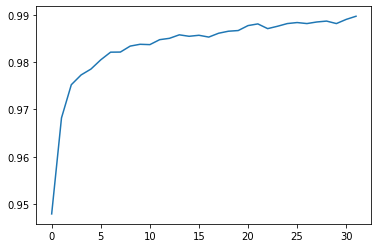

In [21]:
plt.plot(history.history['accuracy'])

In [22]:
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("mnist_kaggle.csv",index=False)

In [23]:
# 98.18 in training
# got a 0.99357 score on kaggle

In [24]:
files.download('mnist_kaggle.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>